In [2]:
# %% 데이터 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(threshold=784,linewidth=np.inf) #출력 깔끔하게

df_a = pd.read_csv('./data_a.txt', header=None, names=['당도', '밀도', '색상', '수분함량'])
df_a.insert(0, '품종', 'A')

df_b = pd.read_csv('./data_b.txt', header=None, names=['당도', '밀도', '색상', '수분함량'])
df_b.insert(0, '품종', 'B')

df = pd.concat([df_a, df_b]).reset_index(drop=True)

df.info()
df.head()
df.tail()

# %% 1. PCA를 이용하여 이들 1,500개 데이터의 분포를 가장 잘 설명할 수 있는 
#   2개 의 주성분 벡터(principal component) v1, v2를 구하시오

#1-1) 공분산 행렬
X = df.iloc[:, 1:].T.to_numpy()
X.shape #(4, 1500)
num = X.shape[1]
X_mean = X.mean(axis=1)[:, None]

#라이브러리 np.cov(X)
Cov_matrix = 1/num * (X-X_mean) @ (X-X_mean).T #다음식과 같음 1/num*X @ X.T - X_mean @ X_mean.T
Cov_matrix.shape #(4, 4)
print("공분산 행렬\n", Cov_matrix)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   품종      1500 non-null   object 
 1   당도      1500 non-null   float64
 2   밀도      1500 non-null   float64
 3   색상      1500 non-null   float64
 4   수분함량    1500 non-null   float64
dtypes: float64(4), object(1)
memory usage: 58.7+ KB
공분산 행렬
 [[ 4.65090376e-02  1.97340409e-02 -7.80348456e-03 -5.78909073e-03]
 [ 1.97340409e-02  5.32105620e+00 -9.54223636e+00  1.08534497e+00]
 [-7.80348456e-03 -9.54223636e+00  1.87738159e+01 -3.11639383e-01]
 [-5.78909073e-03  1.08534497e+00 -3.11639383e-01  1.86700153e+00]]


In [3]:

#1-2) 공분산 행렬의 대각화
# eigen_vals, eigen_vecs = np.linalg.eig(Cov_matrix)
V, D, V_t =np.linalg.svd(Cov_matrix)
print("주성분 벡터 행렬\n", V)

#1-3) 두개의 주성분 벡터
v1, v2 = V[:, :2][:, 0], V[:, :2][:, 1]
print(f"v1:{v1}\nv2:{v2}")
# v1:[-6.67158129e-04 -4.61168082e-01  8.86602137e-01 -3.54993785e-02], v2:[-5.78326498e-05  3.47159384e-01  2.17105195e-01  9.12329816e-01]

# %% 2. 두 주성분 벡터 v1, v2에 의해 생성되는 부분공간 S를 생각하자. 
# 원래의 1,500개 데이터를 부분공간 S에 투영한 좌표(coordinate)를 구하고 
# 이들을 2D 평면에 가시화(visualization)하시오. 
# 단, 구분이 용이하도록 A 데이터의 색상과 B 데이터의 색상을 달리하여 표시하시오.
P = V[:, :2]
X_pca = P.T @ X
X.shape #(4, 1500)
X_pca.shape #(2, 1500)

df['pca_v1'] = X_pca.T[:, 0]
df['pca_v2'] = X_pca.T[:, 1]


주성분 벡터 행렬
 [[-6.67158129e-04 -5.78326498e-05  9.47542117e-01  3.19630235e-01]
 [-4.61168082e-01  3.47159384e-01  2.60731478e-01 -7.73836842e-01]
 [ 8.86602137e-01  2.17105195e-01  1.31113718e-01 -3.86796042e-01]
 [-3.54993785e-02  9.12329816e-01 -1.30354229e-01  3.86525389e-01]]
v1:[-6.67158129e-04 -4.61168082e-01  8.86602137e-01 -3.54993785e-02]
v2:[-5.78326498e-05  3.47159384e-01  2.17105195e-01  9.12329816e-01]


In [4]:

#2-1) 품종 A 그리기

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "/anaconda3/lib/python3.9/site-packages/cv2/qt/fonts/DejaVuSans.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()

rc('font', family=font)



FileNotFoundError: [Errno 2] No such file or directory: '/anaconda3/lib/python3.9/site-packages/cv2/qt/fonts/DejaVuSans.ttf'

/home/ari/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ari/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ari/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ari/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ari/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/hom

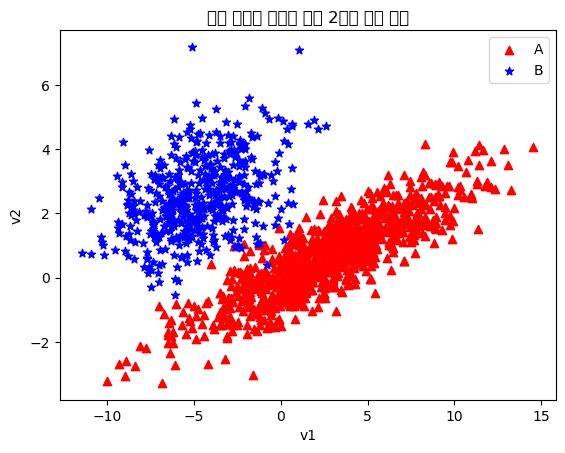

In [5]:
plt.title('사과 데이터 주성분 벡터 2개로 차원 축소')
plt.scatter(df[df['품종']=='A']['pca_v1'], df[df['품종']=='A']['pca_v2'], marker='^' , c='red', label='A')
plt.scatter(df[df['품종']=='B']['pca_v1'], df[df['품종']=='B']['pca_v2'], marker='*' , c='blue', label='B')
plt.xlabel('v1')
plt.ylabel('v2')
plt.legend()
plt.show()

In [6]:

# %% 3. 부분공간 S에서의 A 데이터의 분포와 B 데이터의 분포를 각각 2D Gaussian
# 으로 모델링하시오.
A = df[df['품종']=='A'][['pca_v1', 'pca_v2']].to_numpy().T
B = df[df['품종']=='B'][['pca_v1', 'pca_v2']].to_numpy().T
print(df[df['품종']=='A'][['pca_v1', 'pca_v2']].to_numpy())

dim = A.shape[0]
num_A = A.shape[1]
num_B = B.shape[1]
A_mean = A.mean(axis=1)[:, None]
B_mean = B.mean(axis=1)[:, None]

A_cov = 1/num_A * (A-A_mean) @ (A-A_mean).T
B_cov = 1/num_B * (B-B_mean) @ (B-B_mean).T
A_cov_inverse = np.linalg.inv(A_cov)
B_cov_inverse = np.linalg.inv(B_cov)
A_cov_det = np.linalg.det(A_cov)
B_cov_det = np.linalg.det(B_cov)
print("A품종 pca데이터의 공분산 행렬\n", A_cov)
print("B품종 pca데이터의 공분산 행렬\n", B_cov)
print("A품종 pca데이터의 공분산 역행렬\n", A_cov_inverse)
print("B품종 pca데이터의 공분산 역행렬\n", B_cov_inverse)
print("A품종 pca데이터의 공분산 행렬의 행렬식", A_cov_det)
print("B품종 pca데이터의 공분산 행렬의 행렬식", B_cov_det)

#%%

[[-1.24600087 -0.00819168]
 [ 2.46939821 -0.50839685]
 [-0.45114762 -0.24524128]
 ...
 [ 0.81523437 -0.0562484 ]
 [ 2.62722982  0.49849943]
 [ 6.67994506  2.23059427]]
A품종 pca데이터의 공분산 행렬
 [[14.60889462  3.96863387]
 [ 3.96863387  1.46886565]]
B품종 pca데이터의 공분산 행렬
 [[6.00606671 1.17584594]
 [1.17584594 1.37448625]]
A품종 pca데이터의 공분산 역행렬
 [[ 0.25731433 -0.69522109]
 [-0.69522109  2.55917071]]
B품종 pca데이터의 공분산 역행렬
 [[ 0.19999385 -0.17109081]
 [-0.17109081  0.87390938]]
A품종 pca데이터의 공분산 행렬의 행렬식 5.708448660634624
B품종 pca데이터의 공분산 행렬의 행렬식 6.872642440355935


In [7]:

#3-1) A품종 pca 데이터의 2d 가우시안 분포
#x,y 축 좌표 생성
x, y = np.mgrid[-8:14:.1, -3:4:.1]
pos = np.dstack([x, y])
print(pos.shape)
print(pos.reshape(-1, 2).T.shape)
print(pos.reshape(-1, 2).T)
pos = pos.reshape(-1, 2).T
print(pos.shape)


(220, 70, 2)
(2, 15400)
[[-8.  -8.  -8.  ... 13.9 13.9 13.9]
 [-3.  -2.9 -2.8 ...  3.7  3.8  3.9]]
(2, 15400)


(220, 70)
(2, 15400)


/home/ari/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ari/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ari/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ari/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ari/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/h

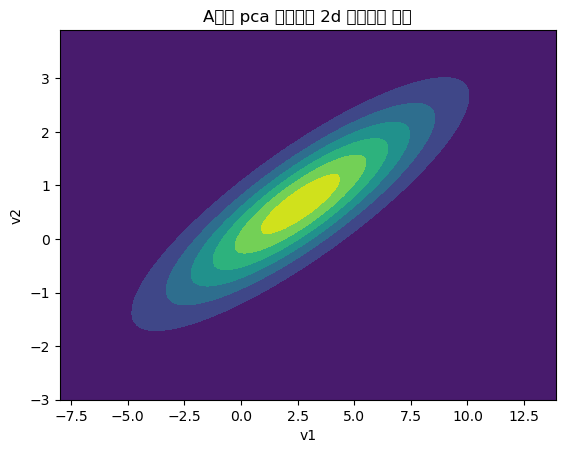

In [8]:

#2d 가우시안 분포
gaussian_2d = 1 / np.sqrt((2*np.pi)**dim * A_cov_det) * np.exp(-1/2*(pos-A_mean).T @ A_cov_inverse @ (pos-A_mean))
gaussian_2d = np.diag(gaussian_2d).reshape(x.shape)

print(gaussian_2d.shape)
print(pos.shape)
# rv = multivariate_normal(mean=A_mean.flatten(), cov=A_cov)
plt.title('A품종 pca 데이터의 2d 가우시안 분포')
plt.contourf(x, y, gaussian_2d)
plt.xlabel('v1')
plt.ylabel('v2')
plt.show()



/home/ari/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ari/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ari/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ari/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ari/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/h

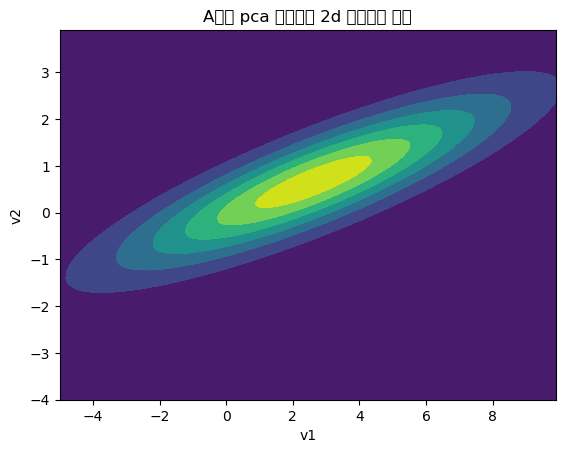

/tmp/ipykernel_52184/2316709466.py:19: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


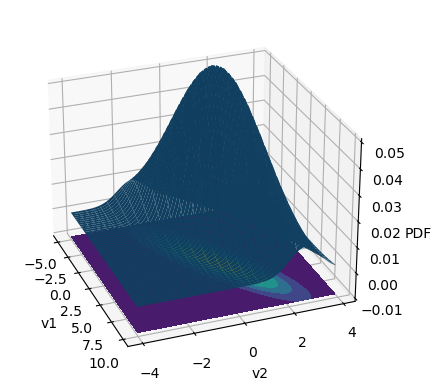

(110, 50, 2)
(2, 5500)
[[-10.  -10.  -10.  ...   0.9   0.9   0.9]
 [  0.    0.1   0.2 ...   4.7   4.8   4.9]]
(2, 5500)
(110, 50)
(2, 5500)


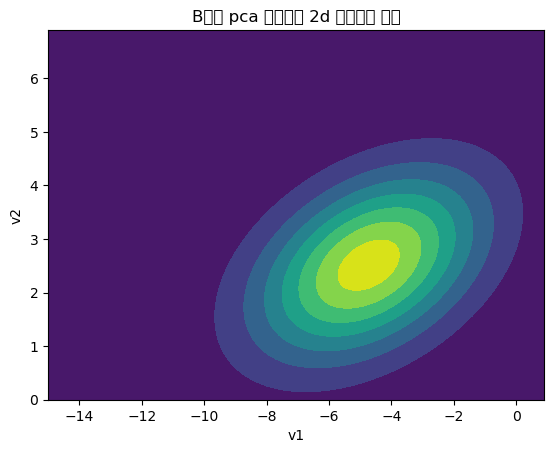

/tmp/ipykernel_52184/2316709466.py:71: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


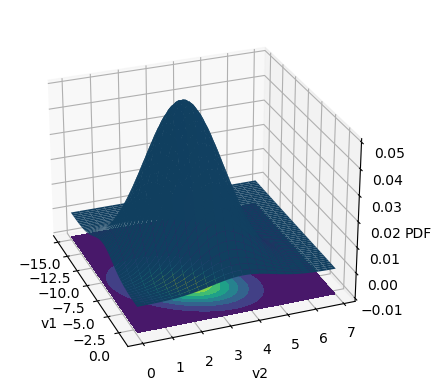

       당도       밀도      색상    수분함량
0  0.6322  -3.2764  1.6776 -0.2263
1 -4.1113  10.9427 -1.1570 -1.7366
(4, 2)
테스트 데이터 차원축소 
 [[ 3.00594658 -6.00783154]
 [-0.97971413  1.96355609]]
A품종 가우시안 분포와의 마할노비스 거리 [2.77695075 6.2715029 ]


ValueError: Input vector should be 1-D.

In [9]:

# %%
#A품종 pca 데이터의 2d 가우시안 분포 - 라이브러리
#참조 : http://incredible.ai/statistics/2014/03/15/Multivariate-Gaussian-Distribution/ 
from scipy.stats import multivariate_normal
x, y = np.mgrid[-5:10:.1, -4:4:.1]
pos = np.dstack((x, y))
rv = multivariate_normal(A_mean.flatten(), A_cov)
z = rv.pdf(pos)

plt.title('A품종 pca 데이터의 2d 가우시안 분포')
plt.contourf(x, y, rv.pdf(pos))
plt.xlabel('v1')
plt.ylabel('v2')
plt.show()

# A품종 pca 데이터의 2d 가우시안 분포 3D 그래프
# plt.title('A품종 pca 데이터의 2d 가우시안 분포')
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z, rstride=3, cstride=3, linewidth=1, antialiased=True)
ax.contourf(x, y, z, zdir='z', offset=-0.01)

ax.set_zlim(-0.01,0.05)
ax.view_init(27, -21)
ax.set_xlabel('v1')
ax.set_ylabel('v2')
ax.set_zlabel('PDF')

plt.show()

# %%
# 3-2) B품종 pca 데이터의 2d 가우시안 분포 
#x,y 축 모두 -5~5까지의 좌표 생성
x, y = np.mgrid[-10:1:.1, 0:5:.1]
pos = np.dstack([x, y])
print(pos.shape)
print(pos.reshape(-1, 2).T.shape)
print(pos.reshape(-1, 2).T)
pos = pos.reshape(-1, 2).T
print(pos.shape)

#2d 가우시안 분포
gaussian_2d = 1 / np.sqrt((2*np.pi)**dim * B_cov_det) * np.exp(-1/2*(pos-B_mean).T @ B_cov_inverse @ (pos-B_mean))
gaussian_2d = np.diag(gaussian_2d).reshape(x.shape)

print(gaussian_2d.shape)
print(pos.shape)
# rv = multivariate_normal(mean=A_mean.flatten(), cov=A_cov)
plt.title('A품종 pca 데이터의 2d 가우시안 분포')
plt.contourf(x, y, gaussian_2d)
plt.xlabel('v1')
plt.ylabel('v2')

# %% 
# B품종 pca 데이터의 2d 가우시안 분포 - 라이브러리
from scipy.stats import multivariate_normal
x, y = np.mgrid[-15:1:.1, 0:7:.1]
pos = np.dstack((x, y))
rv = multivariate_normal(B_mean.flatten(), B_cov)
z = rv.pdf(pos)

plt.title('B품종 pca 데이터의 2d 가우시안 분포')
plt.contourf(x, y, rv.pdf(pos))
plt.xlabel('v1')
plt.ylabel('v2')
plt.show()

# B품종 pca 데이터의 2d 가우시안 분포 3D 그래프
# plt.title('A품종 pca 데이터의 2d 가우시안 분포')
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z, rstride=3, cstride=3, linewidth=1, antialiased=True)
ax.contourf(x, y, z, zdir='z', offset=-0.01)

ax.set_zlim(-0.01,0.05)
ax.view_init(27, -21)
ax.set_xlabel('v1')
ax.set_ylabel('v2')
ax.set_zlabel('PDF')

plt.show()
# %% 4. 올해 새로 수확한 사과 2개체에 대해 당도, 밀도, 색상, 수분함량을 측정하였
# 더니 test.txt와 같은 결과가 나왔다. 이 때, 새로 측정한 데이터를 부분공간
# 에 투영한 후 앞서 구한 Gaussian 분포와의 ‘Mahalanobis 거리’를 계산하고
# 이를 이용하여 새로 수확한 사과 2개체의 품종을 각각 구분하시오.

test_df = pd.read_csv('./test.txt', header=None, names=['당도', '밀도', '색상', '수분함량'])
print(test_df)

#4-1) test 데이터를 부분공간 S로 투영
Test = test_df.to_numpy().T
print(Test.shape)

Test_pca = P.T @ Test
print("테스트 데이터 차원축소 \n",Test_pca)

# 마할노비스 거리 정의 : ((x-u)^T @ cov_inv @ (x-u))^0.5
# 4-2) A품종 2d 가우시안 분포와 마할노비스 거리 구하기
m_dis = ((Test_pca-A_mean).T @ A_cov_inverse @ (Test_pca-A_mean))
m_dis = np.sqrt(np.diag(m_dis))
print("A품종 가우시안 분포와의 마할노비스 거리", m_dis)

#라이브러리 활용하여 거리 구하기
from scipy.spatial import distance
print("첫 번째 테스트 데이터 :", distance.mahalanobis(A_mean, Test_pca[:, 0], A_cov_inverse))
print("두 번째 테스트 데이터 :", distance.mahalanobis(A_mean, Test_pca[:, 1], A_cov_inverse))
test_df = test_df.assign(마할노비스_A = m_dis)
test_df
# %%
# 4-3) B품종 2d 가우시안 분포와 마할노비스 거리 구하기
m_dis = ((Test_pca-B_mean).T @ B_cov_inverse @ (Test_pca-B_mean))
m_dis = np.sqrt(np.diag(m_dis))
print("B품종 가우시안 분포와의 마할노비스 거리", m_dis)

#라이브러리 활용하여 거리 구하기
from scipy.spatial import distance
print("B품종과의 거리 첫 번째 테스트 데이터 :", distance.mahalanobis(B_mean, Test_pca[:, 0], B_cov_inverse))
print("B품종과의 거리 두 번째 테스트 데이터 :", distance.mahalanobis(B_mean, Test_pca[:, 1], B_cov_inverse))

test_df = test_df.assign(마할노비스_B= m_dis)
test_df

# %%
#4-4) 테스트 데이터 품종 판별
test_df['품종'] = test_df.apply(lambda x: 'A' if x['마할노비스_A'] < x['마할노비스_B'] else 'B', axis=1)
print(test_df)
#첫번째 데이터 = A
#두번째 데이터 = B

#4-5) 시각화
x_a, y_a = np.mgrid[-10:10:.1, -4:5.5:.1]
pos_a = np.dstack((x_a, y_a))

x_b, y_b = np.mgrid[-10:1:.1, 0:5.5:.1]
pos_b = np.dstack((x_b, y_b))

rv_a = multivariate_normal(A_mean.flatten(), A_cov)
z_a = rv_a.pdf(pos_a)

rv_b = multivariate_normal(B_mean.flatten(), B_cov)
z_b = rv_b.pdf(pos_b)


plt.figure(figsize=(8,8))
plt.title('A,B 2d 가우시안 분포와 테스트 데이터')
plt.contourf(x_a, y_a, z_a, label='A', cmap='RdBu_r')
plt.text(A_mean[0], A_mean[1], 'A', color='red', fontsize='x-large')
# plt.contour(x_a, y_a, z_a)
plt.contour(x_b, y_b, z_b, label='B')
plt.text(B_mean[0], B_mean[1], 'B', color='blue', fontsize='x-large')
plt.scatter(Test_pca[0, 0], Test_pca[1, 0], label='t1', color='r')
plt.text(Test_pca[0, 0]+0.2, Test_pca[1, 0], 'test1', color='red', fontsize='x-large')
plt.scatter(Test_pca[0, 1], Test_pca[1, 1], label='t2', color='b')
plt.text(Test_pca[0, 1]+0.2, Test_pca[1, 1], 'test2', color='blue', fontsize='x-large')
plt.legend()
plt.xlabel('v1')
plt.ylabel('v2')
plt.show()